In [88]:
# data manipulation
import pandas as pd
import numpy as np
import os
import sys

import logging 
logging.basicConfig(format='%(message)s')
log = logging.getLogger()
log.setLevel(logging.INFO)

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#RDKit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D

try:
    import adjustText
except ModuleNotFoundError:
    !pip install adjustText
    
from adjustText import adjust_text
    

try:
    import mlxtend
except ModuleNotFoundError:
    !pip install mlxtend
    
from mlxtend.plotting import plot_pca_correlation_graph

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# own module
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Modules import scaling
from Modules import finger_prints as fp
from Modules import molecules_and_images as mi

random_seed = 10459
np.random.seed = random_seed
log.info(f"Random seed fixed as {random_seed}")

Random seed fixed as 10459


In [89]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 10)

First load the data

In [90]:
data = pd.read_csv("First_set_full.csv")

In [91]:
data

,Reaction,Substrate,Catalyst,Solvent,Solvent code,Temperature,ee,DDG,Paper
0,0,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,14,0.569810,Nature 2009
1,1,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,41,1.761325,Nature 2009
2,2,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,30,1.251493,Nature 2009
3,3,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,86,5.229434,Nature 2009
4,4,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,58,2.678563,Nature 2009
5,5,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,90,5.952686,Nature 2009
6,6,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,77,4.125533,Nature 2009
7,7,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,97,8.459866,Nature 2009
8,8,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,93,6.705437,Nature 2009
9,9,CCC(CC)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,96,7.867979,Nature 2009


Check for duplicates

In [92]:
data.duplicated().sum()

0

if you have duplicates in your data we suggest you pay close attention to which entry you are going to keep. also make sure you check that the same catalyst, substrate and conditions are not tested experimentally more than once but produce different ddg values. in this case, you should make sure to keep the most reliable entry according to your judgment.

In [93]:
df_final = data.drop_duplicates()

In [94]:
df_final

,Reaction,Substrate,Catalyst,Solvent,Solvent code,Temperature,ee,DDG,Paper
0,0,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,14,0.569810,Nature 2009
1,1,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,41,1.761325,Nature 2009
2,2,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,30,1.251493,Nature 2009
3,3,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,86,5.229434,Nature 2009
4,4,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,58,2.678563,Nature 2009
5,5,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,90,5.952686,Nature 2009
6,6,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,77,4.125533,Nature 2009
7,7,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,97,8.459866,Nature 2009
8,8,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,93,6.705437,Nature 2009
9,9,CCC(CC)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,96,7.867979,Nature 2009


Explore the data

How many unique target (ddg) values do we have?

In [95]:
len(df_final.DDG.unique())

70

How often does each occure?

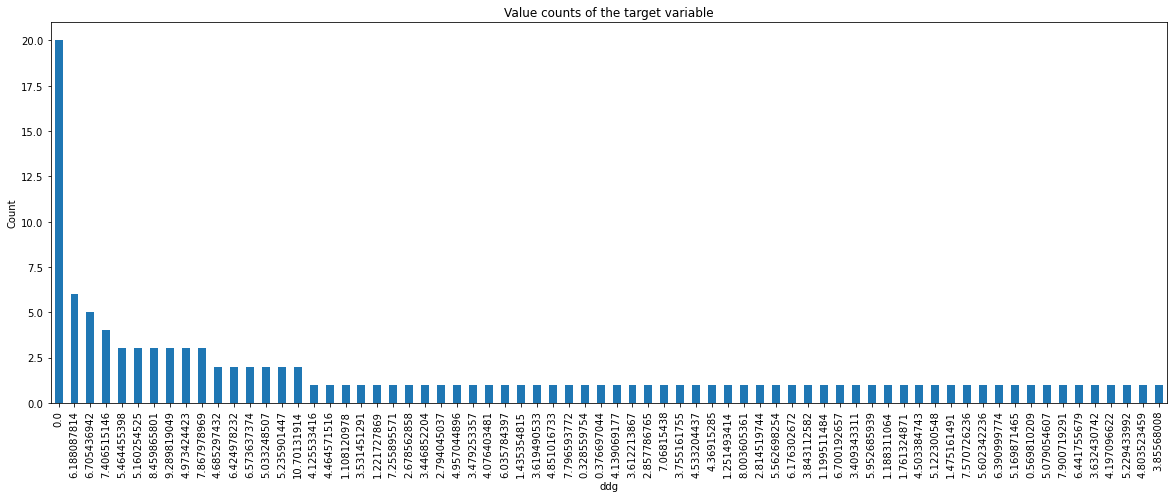

In [96]:
fig,ax = plt.subplots()
fig.set_size_inches(20.0,7.0)

df_final.DDG.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("ddg")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Grouping them into a histogram to better understand how often they occure, change bins as you wish

(array([23.,  8.,  4., 14., 23., 15., 17., 10.,  3.,  2.]),
 array([ 0.        ,  1.07013191,  2.14026383,  3.21039574,  4.28052766,
         5.35065957,  6.42079148,  7.4909234 ,  8.56105531,  9.63118723,
        10.70131914]),
 <BarContainer object of 10 artists>)

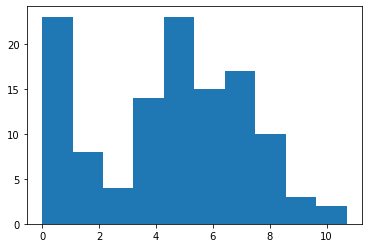

In [97]:
plt.hist(df_final.DDG, bins = 10)

How about the frequency the catalysts and the substrates occure?

In [98]:
len(df_final.Substrate.unique())

63

In [99]:
uniqueSubstrates = df_final.Substrate.unique()

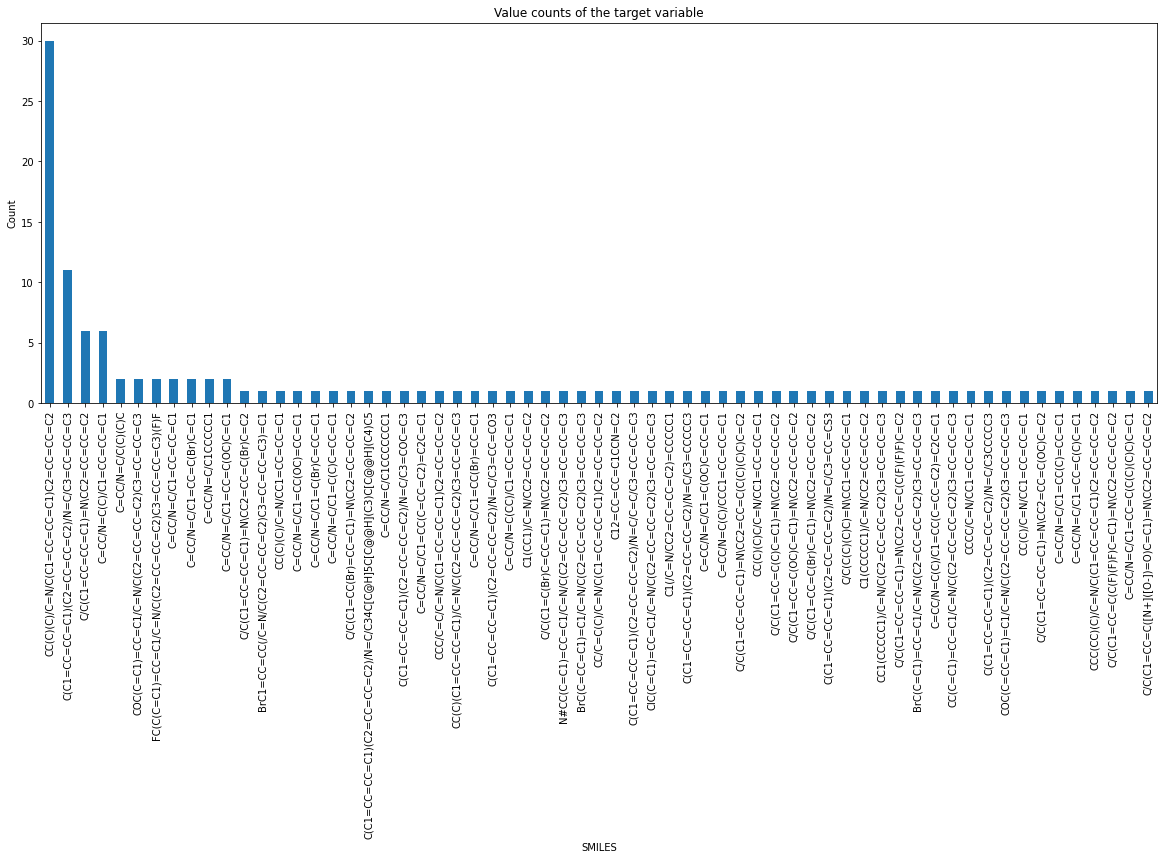

In [100]:
fig,ax = plt.subplots()
fig.set_size_inches(20.0,7.0)

df_final.Substrate.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("SMILES")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [101]:
len(df_final.Catalyst.unique())

19

In [102]:
uniqueCatalysts = df_final.Catalyst.unique()

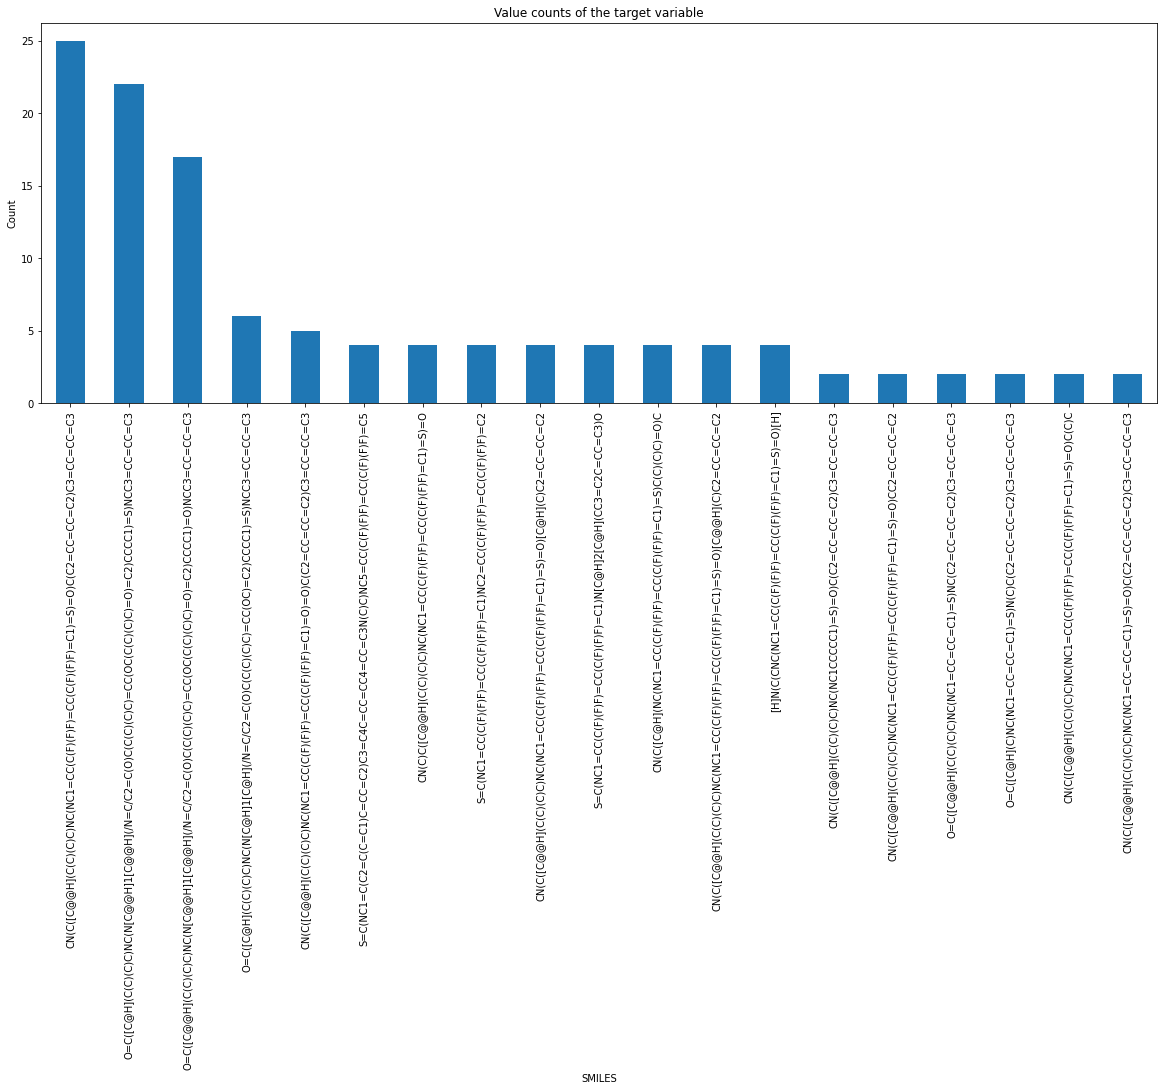

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(20.0,7.0)

df_final.Catalyst.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("SMILES")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Lets check the tanimoto similarity between the molecules. This will show us how diverse the chemical space is.

First we calculate the morgan fingerprints. If you wish you can use other type of fingerprints like rdkit. for more options check the finger_prints module.

In [17]:
fingerSubstrates, fingerSubstrates_df = fp.morgan_fingerprints(uniqueSubstrates)

In [18]:
fingerCatalysts, fingerCatalysts_df = fp.morgan_fingerprints(uniqueCatalysts)

Now we get the average similarity of the substrates

In [19]:
average=[]
for s in range(len(fingerSubstrates)):
    ts = fp.bulk_similarity(fingerSubstrates[s], fingerSubstrates)
    average.append(np.average(np.array(ts["tanimoto_similarity"])))
    log.info(ts)
    log.info(average)

/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7       7  [1, 0, 1, 0, 1, 0,

[0.42483873830953084]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7      

[0.42483873830953084, 0.4592603885445309]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
4       4  [1

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0,

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1,

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0    

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       f

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                    

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   numbe

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_si

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets),

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.arra

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndar

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' w

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spe

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths o

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wit

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences 

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragg

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecat

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modu

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812]
/Users/matina/Desktop/chapter3Pythi

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145]
/Users/matina/

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

[0.42483873830953084, 0.4592603885445309, 0.42185882517379225, 0.38016316593587224, 0.42185882517379225, 0.40975016340345766, 0.42278023848251556, 0.40553727999269845, 0.4298793896466833, 0.4314669525435332, 0.41215209165314826, 0.3990784097286565, 0.4314669525435332, 0.38227913459647195, 0.4063838113769306, 0.4314669525435332, 0.3458955778594343, 0.3604408843909598, 0.3458955778594343, 0.3967318824617353, 0.38339239966046046, 0.3576393147897987, 0.38731120586407913, 0.4603019265823924, 0.4420582036094663, 0.43209725262298815, 0.36341705480203496, 0.4548769421960247, 0.42692024354088826, 0.42846230691641934, 0.34971356781665386, 0.40311321999739674, 0.41254089202506566, 0.42846230691641934, 0.40394932135010103, 0.3882169507465886, 0.40311321999739674, 0.41254089202506566, 0.4119696902781969, 0.42846230691641934, 0.464251148570233, 0.4097006875482812, 0.43331287634879834, 0.4337312749934954, 0.2825853297039868, 0.28134761953230525, 0.4097006875482812, 0.38544215811540145, 0.439012097910

and here are the substrates sorted according to similarity

In [20]:
average
average2 = enumerate(average)
average3 = sorted(average2, key=lambda x: x[1])
average3

[(45, 0.28134761953230525),
 (44, 0.2825853297039868),
 (61, 0.2825853297039868),
 (16, 0.3458955778594343),
 (18, 0.3458955778594343),
 (30, 0.34971356781665386),
 (21, 0.3576393147897987),
 (17, 0.3604408843909598),
 (26, 0.36341705480203496),
 (3, 0.38016316593587224),
 (13, 0.38227913459647195),
 (20, 0.38339239966046046),
 (47, 0.38544215811540145),
 (56, 0.3854611958322988),
 (22, 0.38731120586407913),
 (35, 0.3882169507465886),
 (57, 0.3960952902665321),
 (19, 0.3967318824617353),
 (11, 0.3990784097286565),
 (62, 0.4025750651689469),
 (31, 0.40311321999739674),
 (36, 0.40311321999739674),
 (34, 0.40394932135010103),
 (7, 0.40553727999269845),
 (14, 0.4063838113769306),
 (58, 0.4073696077129827),
 (52, 0.40801497396916847),
 (41, 0.4097006875482812),
 (46, 0.4097006875482812),
 (5, 0.40975016340345766),
 (38, 0.4119696902781969),
 (10, 0.41215209165314826),
 (32, 0.41254089202506566),
 (37, 0.41254089202506566),
 (55, 0.415056278805517),
 (60, 0.415056278805517),
 (59, 0.41513097

Now we get the average similarity for the catalysts

In [21]:
average=[]
for s in range(len(fingerCatalysts)):
    ts = fp.bulk_similarity(fingerCatalysts[s], fingerCatalysts)
    average.append(np.average(np.array(ts["tanimoto_similarity"])))
    log.info(ts)
    log.info(average)

/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
7       7  [1, 0, 1, 0, 1, 0,

[0.6286069957532912, 0.6076950151870116, 0.6038699401759114]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0,

[0.6286069957532912, 0.6076950151870116, 0.6038699401759114, 0.6038699401759114, 0.6181229051231236, 0.25835061719204716]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, ...   
1       1  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, ...   
2       2  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, ...   
3       3  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, ...   
4       4  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, ...   
5       5  [1, 1, 1, 0, 1, 0, 0, 0,

[0.6286069957532912, 0.6076950151870116, 0.6038699401759114, 0.6038699401759114, 0.6181229051231236, 0.25835061719204716, 0.319314691424289, 0.6156704800119956, 0.4666771926100395]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0

[0.6286069957532912, 0.6076950151870116, 0.6038699401759114, 0.6038699401759114, 0.6181229051231236, 0.25835061719204716, 0.319314691424289, 0.6156704800119956, 0.4666771926100395, 0.5399867438155438, 0.5757240890297227, 0.4529434934790709]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

[0.6286069957532912, 0.6076950151870116, 0.6038699401759114, 0.6038699401759114, 0.6181229051231236, 0.25835061719204716, 0.319314691424289, 0.6156704800119956, 0.4666771926100395, 0.5399867438155438, 0.5757240890297227, 0.4529434934790709, 0.33639116316944445, 0.33495123828660134, 0.472685747312499]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,

[0.6286069957532912, 0.6076950151870116, 0.6038699401759114, 0.6038699401759114, 0.6181229051231236, 0.25835061719204716, 0.319314691424289, 0.6156704800119956, 0.4666771926100395, 0.5399867438155438, 0.5757240890297227, 0.4529434934790709, 0.33639116316944445, 0.33495123828660134, 0.472685747312499, 0.417903502287532, 0.38428015261828974, 0.6286069957532912]
/Users/matina/Desktop/chapter3Pythia/Pythia-main-2/Modules/finger_prints.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

In [22]:
average
average2 = enumerate(average)
average3 = sorted(average2, key=lambda x: x[1])
average3

[(5, 0.25835061719204716),
 (6, 0.319314691424289),
 (13, 0.33495123828660134),
 (12, 0.33639116316944445),
 (16, 0.38428015261828974),
 (15, 0.417903502287532),
 (11, 0.4529434934790709),
 (8, 0.4666771926100395),
 (14, 0.472685747312499),
 (18, 0.49914050380270664),
 (9, 0.5399867438155438),
 (10, 0.5757240890297227),
 (2, 0.6038699401759114),
 (3, 0.6038699401759114),
 (1, 0.6076950151870116),
 (7, 0.6156704800119956),
 (4, 0.6181229051231236),
 (0, 0.6286069957532912),
 (17, 0.6286069957532912)]

PCA can help understand the chemical space under study, although when used with fingerprints it is not particulary intuitive it can allow for the visualisation of molecular similarities and identify potential clusters or trends giving insights in the diversity of the dataset 

In [63]:
# We start with the substrate space
scaler = MinMaxScaler()
data_sub_rescaled = scaler.fit_transform(fingerSubstrates_df)

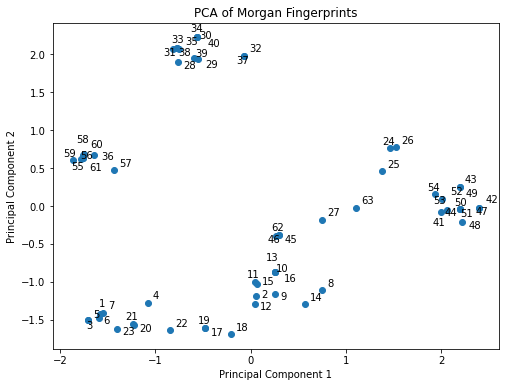

In [83]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_sub_rescaled)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Add labels and title
texts=[]
for i, pc in enumerate(principal_components):
    label = f"{i+1}"
    texts.append(
        plt.annotate(label, (pc[0], pc[1]), fontsize=10, ha='right', textcoords="offset points",xytext=(5,2))
    )
adjust_text(texts)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Morgan Fingerprints')

plt.show()

In [65]:
# Here we do the same for the catalyst space
scaler = MinMaxScaler()
data_cat_rescaled = scaler.fit_transform(fingerCatalysts_df)

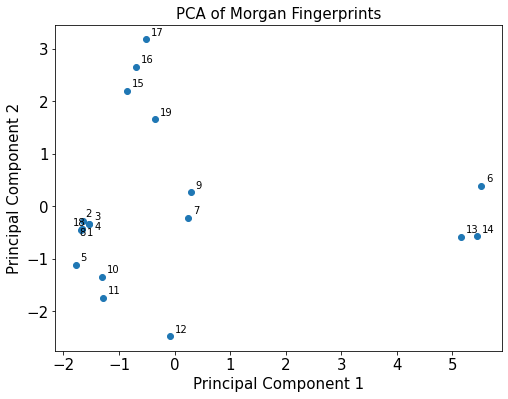

In [87]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_cat_rescaled)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Add labels and title
texts=[]
for i, pc in enumerate(principal_components):
    label = f"{i+1}"
    texts.append(
        plt.annotate(label, (pc[0], pc[1]), fontsize=10, ha='right', textcoords="offset points",xytext=(5,2))
    )
adjust_text(texts)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('PCA of Morgan Fingerprints', fontsize = 15)

plt.show()

In this example the target values are scalled as we are exploring ddg in kcal/mol. In other cases, target values need to be normalized. Here are some examples on how to do that

In [53]:
# scale a pandas dataframe using autoscaling/z-scaling
scaling.autoscale(df_final.DDG)

0     -1.344518
1     -0.927141
2     -1.105730
3      0.287709
4     -0.605840
5      0.541058
6     -0.098978
7      1.419302
8      0.804740
9      1.211969
10     0.235032
11     1.050322
12     0.804740
13    -0.197908
14     2.204465
15     1.710028
16     1.710028
17     1.710028
18     1.211969
19     0.804740
20     2.204465
21     0.404449
22     1.419302
23     0.706498
24     0.804740
25     1.419302
26     1.050322
27     1.050322
28     0.619389
29     1.050322
30    -0.228716
31    -0.094237
32    -0.565387
33     0.097103
34    -1.041325
35     0.155153
36     0.218987
37     0.370035
38     0.370035
39     0.043826
40     0.570167
41     0.218987
42    -1.027381
43    -0.543059
44     0.370035
45     0.289974
46     0.097103
47     0.289974
48     0.804740
49     1.211969
50     0.706498
51     1.259478
52     1.107844
53     0.266845
54     0.250181
55    -0.325365
56    -0.349854
57    -1.123939
58    -1.127863
59    -1.429026
60    -1.412164
61    -0.278790
62    -0

In [54]:
# scale a pandas dataframe using min max scaling
scaling.minmaxscale(df_final.DDG)

0      0.053247
1      0.164590
2      0.116948
3      0.488672
4      0.250302
5      0.556257
6      0.385516
7      0.790544
8      0.626599
9      0.735234
10     0.474619
11     0.692112
12     0.626599
13     0.359125
14     1.000000
15     0.868100
16     0.868100
17     0.868100
18     0.735234
19     0.626599
20     1.000000
21     0.519814
22     0.790544
23     0.600391
24     0.626599
25     0.790544
26     0.692112
27     0.692112
28     0.577153
29     0.692112
30     0.350906
31     0.386781
32     0.261094
33     0.437824
34     0.134129
35     0.453310
36     0.470339
37     0.510634
38     0.510634
39     0.423612
40     0.564022
41     0.470339
42     0.137849
43     0.267050
44     0.510634
45     0.489276
46     0.437824
47     0.489276
48     0.626599
49     0.735234
50     0.600391
51     0.747908
52     0.707457
53     0.483106
54     0.478661
55     0.325124
56     0.318591
57     0.112090
58     0.111043
59     0.030703
60     0.035201
61     0.337548
62     0

In [55]:
# scale a pandas dataframe using logarithmic scaling, chose between 2 or 10
scaling.logarithm2(df_final.DDG)

/Users/matina/miniconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -0.811447
1      0.816661
2      0.323651
3      2.386655
4      1.421459
5      2.573541
6      2.044581
7      3.080635
8      2.745331
9      2.975993
10     2.344560
11     2.888795
12     2.745331
13     1.942275
14     3.419717
15     3.215650
16     3.215650
17     3.215650
18     2.975993
19     2.745331
20     3.419717
21     2.475785
22     3.080635
23     2.683692
24     2.745331
25     3.080635
26     2.888795
27     2.888795
28     2.626743
29     2.888795
30     1.908875
31     2.049306
32     1.482355
33     2.228141
34     0.521407
35     2.278287
36     2.331490
37     2.450078
38     2.450078
39     2.180531
40     2.593541
41     2.331490
42     0.560873
43     1.514898
44     2.450078
45     2.388438
46     2.228141
47     2.388438
48     2.745331
49     2.975993
50     2.683692
51     3.000650
52     2.920432
53     2.370128
54     2.356792
55     1.798778
56     1.769494
57     0.262447
58     0.248913
59    -1.605772
60    -1.408523
61     1.852883
62     1

In [56]:
scaling.logarithm10(df_final.DDG)

/Users/matina/miniconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -0.244270
1      0.245839
2      0.097429
3      0.718455
4      0.427902
5      0.774713
6      0.615480
7      0.927363
8      0.826427
9      0.895863
10     0.705783
11     0.869614
12     0.826427
13     0.584683
14     1.029437
15     0.968007
16     0.968007
17     0.968007
18     0.895863
19     0.826427
20     1.029437
21     0.745286
22     0.927363
23     0.807872
24     0.826427
25     0.927363
26     0.869614
27     0.869614
28     0.790729
29     0.869614
30     0.574629
31     0.616903
32     0.446233
33     0.670737
34     0.156959
35     0.685833
36     0.701848
37     0.737547
38     0.737547
39     0.656405
40     0.780734
41     0.701848
42     0.168840
43     0.456030
44     0.737547
45     0.718991
46     0.670737
47     0.718991
48     0.826427
49     0.895863
50     0.807872
51     0.903286
52     0.879138
53     0.713480
54     0.709465
55     0.541486
56     0.532671
57     0.079004
58     0.074930
59    -0.483386
60    -0.424008
61     0.557773
62     0